In [55]:
from math import cos, radians, sin, sqrt

import cadquery as cq
import ipywidgets as widgets
import jupyter_cadquery as jcq
from jupyter_cadquery.replay import replay, show

In [72]:
jcq.set_defaults(
    control="orbit",
    axes=True,
    axes0=True,
    grid=(True, False, False),
    glass=True,
    theme="browser",
)

# open_viewer("Cadquery")
replay_box = widgets.Checkbox(False, description="Enable Replay")
out = widgets.Output()
display(replay_box)
display(out)


@out.capture()
def changed(e):
    if e["new"]:
        jcq.replay.enable_replay(warning=False)
    else:
        jcq.replay.disable_replay()


replay_box.observe(changed, names="value")

Checkbox(value=False, description='Enable Replay')

Output()

In [78]:
d = [85, 20]
thickness = 3
ear_thickness = 5

r = (
    cq.Workplane("XY")
    .rect(d[0]+thickness*2, d[1]+thickness*2)
    .tag("baseplane")
    .center(d[0]/2, 0)
    .rect(10, d[1]+10)
    .extrude(15)
    .workplaneFromTagged("baseplane")
    .rect(d[0], d[1])
    .cutThruAll()
)
replay(r)

Use the multi select box below to select one or more steps you want to examine


In [58]:
cq.exporters.export(r, "/tmp/x.stl")

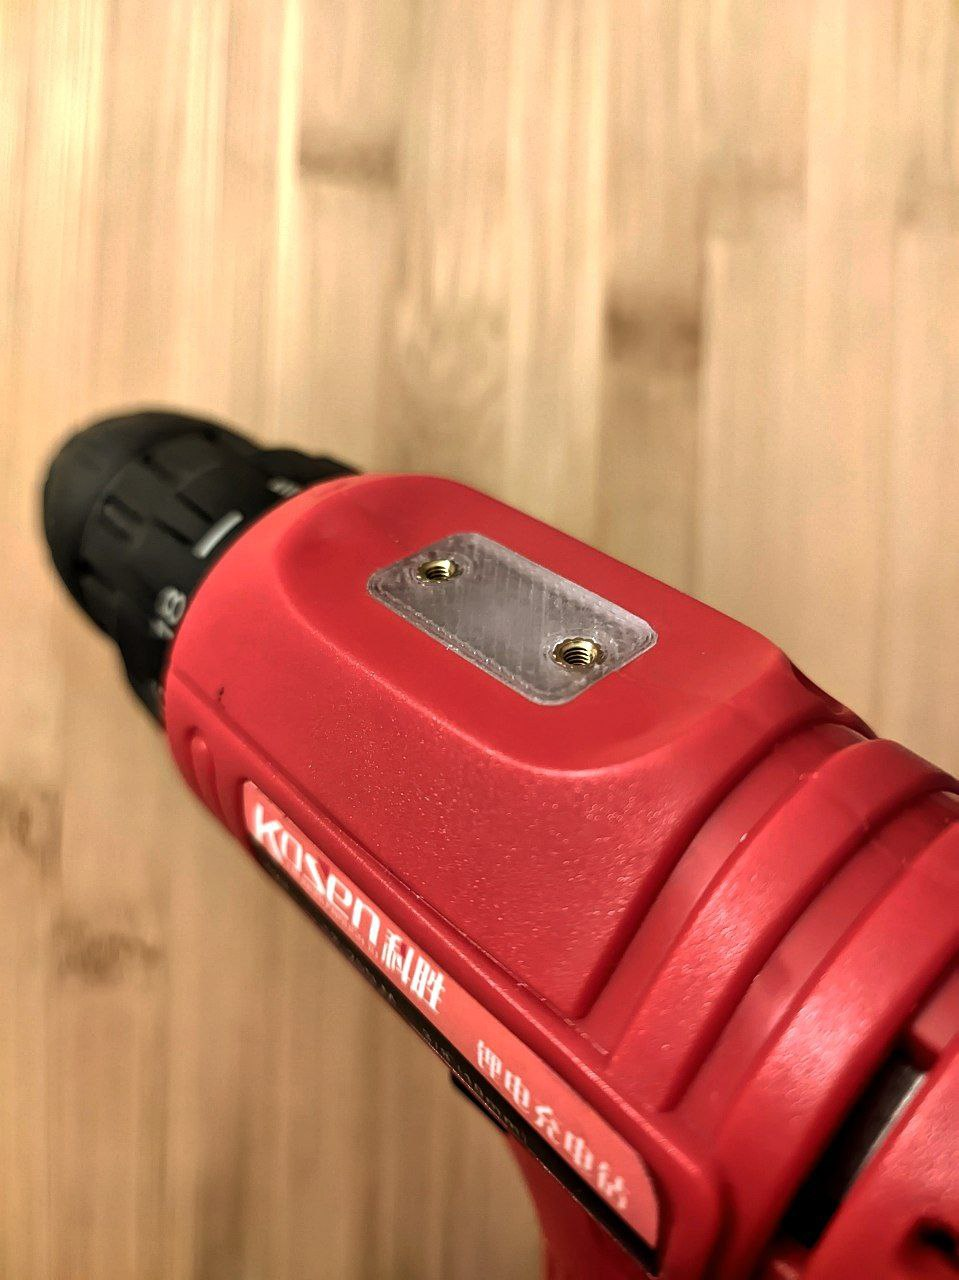